In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import warnings

In [68]:
warnings.filterwarnings("ignore")

In [33]:
data = pd.read_csv("./player_combined_2021_2022.csv")

In [34]:
data_goalkeeper = pd.read_csv("./goalkeeper_combined_2021_2022.csv")

In [35]:
data

Unnamed: 0             Player   Nation    Pos          Squad  \
0              0         Max Aarons  eng ENG     DF   Norwich City   
1              1   Yunis Abdelhamid   ma MAR     DF          Reims   
2              2  Salis Abdul Samed   gh GHA     MF  Clermont Foot   
3              3    Laurent Abergel   fr FRA     MF        Lorient   
4              4        Charles Abi   fr FRA     FW  Saint-Étienne   
...          ...                ...      ...    ...            ...   
2911        2916   Martín Zubimendi   es ESP     MF  Real Sociedad   
2912        2917   Szymon Żurkowski   pl POL     MF         Empoli   
2913        2918    Martin Ødegaard   no NOR  MF,FW        Arsenal   
2914        2919        Milan Đurić   ba BIH     FW    Salernitana   
2915        2920      Filip Đuričić   rs SRB  MF,FW       Sassuolo   

                    Comp  Age  Born   90s    Tkl  ...  Foul_drawn  Offsides  \
0     eng Premier League   21  2000  32.0   64.0  ...          52         1   
1             fr Ligue 1   33  1987  33.1   48.0  ...          25         0   
2             fr Ligue 1   21  2000  27.4   43.0  ...          37         0   
3             fr Ligue 1   28  1993  32.8  110.0  ...          69         1   
4             fr Ligue 1   21  2000   0.5    0.0  ...           0         0   
...                  ...  ...   ...   ...    ...  ...         ...       ...   
2911          es La Liga   22  1999  28.8   52.0  ...          21         3   
2912          it Serie A   23  1997  25.6   58.0  ...          67         0   
2913  eng Premier League   22  1998  30.9   49.0  ...          20         3   
2914          it Serie A   31  1990  24.1    1.0  ...          45         6   
2915          it Serie A   29  1992   7.5   13.0  ...          14         2   

      Tackles_to_win_possession  PKwon  PKcon  OG  recovered_balls  \
0                            44    0.0    2.0   1            154.0   
1                            27    0.0    1.0   0            195.0   
2                            23    0.0    0.0   0            186.0   
3                            60    0.0    0.0   0            264.0   
4                             0    0.0    0.0   0              1.0   
...                         ...    ...    ...  ..              ...   
2911                         25    0.0    0.0   0            139.0   
2912                         33    0.0    1.0   0            162.0   
2913                         21    0.0    2.0   0            162.0   
2914                          1    1.0    0.0   0             40.0   
2915                         10    0.0    0.0   0             34.0   

      Aerial_duel_won  Aerial_duel_lost  Aerial_duel_won%  
0                13.0              50.0              20.6  
1                62.0              38.0              62.0  
2                17.0              20.0              45.9  
3                11.0               7.0              61.1  
4                 0.0               0.0               NaN  
...               ...               ...               ...  
2911             63.0              24.0              72.4  
2912             24.0              32.0              42.9  
2913             14.0              23.0              37.8  
2914            242.0              83.0              74.5  
2915              3.0               5.0              37.5  

[2916 rows x 137 columns]

In [36]:
data.isnull().sum()

Unnamed: 0            0
Player                0
Nation                0
Pos                   1
Squad                 0
                   ... 
OG                    0
recovered_balls       2
Aerial_duel_won       2
Aerial_duel_lost      2
Aerial_duel_won%    225
Length: 137, dtype: int64

In [37]:
data = data.dropna(subset=["Pos"])

In [38]:
data.shape

(2915, 137)

In [39]:
data.fillna(0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8144\2227532753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0, inplace=True)


In [40]:
data['Pos'] = data['Pos'].str.split(',')

C:\Users\user\AppData\Local\Temp\ipykernel_8144\1024894796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pos'] = data['Pos'].str.split(',')


In [61]:
all_positions = set([position for positions_list in data['Pos'] for position in positions_list])

In [64]:
for position in all_positions:
    data[position] = data['Pos'].apply(lambda positions_list: 1 if position in positions_list else 0)

C:\Users\user\AppData\Local\Temp\ipykernel_8144\2597231251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[position] = data['Pos'].apply(lambda positions_list: 1 if position in positions_list else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_8144\2597231251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[position] = data['Pos'].apply(lambda positions_list: 1 if position in positions_list else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_8144\2597231251.py:2: SettingWithCopyWarning: 
A va

In [65]:
data

Unnamed: 0             Player   Nation       Pos          Squad  \
0              0         Max Aarons  eng ENG      [DF]   Norwich City   
1              1   Yunis Abdelhamid   ma MAR      [DF]          Reims   
2              2  Salis Abdul Samed   gh GHA      [MF]  Clermont Foot   
3              3    Laurent Abergel   fr FRA      [MF]        Lorient   
4              4        Charles Abi   fr FRA      [FW]  Saint-Étienne   
...          ...                ...      ...       ...            ...   
2911        2916   Martín Zubimendi   es ESP      [MF]  Real Sociedad   
2912        2917   Szymon Żurkowski   pl POL      [MF]         Empoli   
2913        2918    Martin Ødegaard   no NOR  [MF, FW]        Arsenal   
2914        2919        Milan Đurić   ba BIH      [FW]    Salernitana   
2915        2920      Filip Đuričić   rs SRB  [MF, FW]       Sassuolo   

                    Comp  Age  Born   90s    Tkl  ...  PKcon  OG  \
0     eng Premier League   21  2000  32.0   64.0  ...    2.0   1   
1             fr Ligue 1   33  1987  33.1   48.0  ...    1.0   0   
2             fr Ligue 1   21  2000  27.4   43.0  ...    0.0   0   
3             fr Ligue 1   28  1993  32.8  110.0  ...    0.0   0   
4             fr Ligue 1   21  2000   0.5    0.0  ...    0.0   0   
...                  ...  ...   ...   ...    ...  ...    ...  ..   
2911          es La Liga   22  1999  28.8   52.0  ...    0.0   0   
2912          it Serie A   23  1997  25.6   58.0  ...    1.0   0   
2913  eng Premier League   22  1998  30.9   49.0  ...    2.0   0   
2914          it Serie A   31  1990  24.1    1.0  ...    0.0   0   
2915          it Serie A   29  1992   7.5   13.0  ...    0.0   0   

      recovered_balls  Aerial_duel_won  Aerial_duel_lost  Aerial_duel_won%  \
0               154.0             13.0              50.0              20.6   
1               195.0             62.0              38.0              62.0   
2               186.0             17.0              20.0              45.9   
3               264.0             11.0               7.0              61.1   
4                 1.0              0.0               0.0               0.0   
...               ...              ...               ...               ...   
2911            139.0             63.0              24.0              72.4   
2912            162.0             24.0              32.0              42.9   
2913            162.0             14.0              23.0              37.8   
2914             40.0            242.0              83.0              74.5   
2915             34.0              3.0               5.0              37.5   

      MF  FW  DF  GK  
0      0   0   1   0  
1      0   0   1   0  
2      1   0   0   0  
3      1   0   0   0  
4      0   1   0   0  
...   ..  ..  ..  ..  
2911   1   0   0   0  
2912   1   0   0   0  
2913   1   1   0   0  
2914   0   1   0   0  
2915   1   1   0   0  

[2915 rows x 141 columns]

In [62]:
all_positions

{'DF', 'FW', 'GK', 'MF'}

In [56]:
data.isnull().sum()

Unnamed: 0          0
Player              0
Nation              0
Pos                 0
Squad               0
                   ..
OG                  0
recovered_balls     0
Aerial_duel_won     0
Aerial_duel_lost    0
Aerial_duel_won%    0
Length: 137, dtype: int64

In [57]:
data = data.drop(columns=["Unnamed: 0"])

In [69]:
data

Unnamed: 0             Player   Nation       Pos          Squad  \
0              0         Max Aarons  eng ENG      [DF]   Norwich City   
1              1   Yunis Abdelhamid   ma MAR      [DF]          Reims   
2              2  Salis Abdul Samed   gh GHA      [MF]  Clermont Foot   
3              3    Laurent Abergel   fr FRA      [MF]        Lorient   
4              4        Charles Abi   fr FRA      [FW]  Saint-Étienne   
...          ...                ...      ...       ...            ...   
2911        2916   Martín Zubimendi   es ESP      [MF]  Real Sociedad   
2912        2917   Szymon Żurkowski   pl POL      [MF]         Empoli   
2913        2918    Martin Ødegaard   no NOR  [MF, FW]        Arsenal   
2914        2919        Milan Đurić   ba BIH      [FW]    Salernitana   
2915        2920      Filip Đuričić   rs SRB  [MF, FW]       Sassuolo   

                    Comp  Age  Born   90s    Tkl  ...  PKcon  OG  \
0     eng Premier League   21  2000  32.0   64.0  ...    2.0   1   
1             fr Ligue 1   33  1987  33.1   48.0  ...    1.0   0   
2             fr Ligue 1   21  2000  27.4   43.0  ...    0.0   0   
3             fr Ligue 1   28  1993  32.8  110.0  ...    0.0   0   
4             fr Ligue 1   21  2000   0.5    0.0  ...    0.0   0   
...                  ...  ...   ...   ...    ...  ...    ...  ..   
2911          es La Liga   22  1999  28.8   52.0  ...    0.0   0   
2912          it Serie A   23  1997  25.6   58.0  ...    1.0   0   
2913  eng Premier League   22  1998  30.9   49.0  ...    2.0   0   
2914          it Serie A   31  1990  24.1    1.0  ...    0.0   0   
2915          it Serie A   29  1992   7.5   13.0  ...    0.0   0   

      recovered_balls  Aerial_duel_won  Aerial_duel_lost  Aerial_duel_won%  \
0               154.0             13.0              50.0              20.6   
1               195.0             62.0              38.0              62.0   
2               186.0             17.0              20.0              45.9   
3               264.0             11.0               7.0              61.1   
4                 1.0              0.0               0.0               0.0   
...               ...              ...               ...               ...   
2911            139.0             63.0              24.0              72.4   
2912            162.0             24.0              32.0              42.9   
2913            162.0             14.0              23.0              37.8   
2914             40.0            242.0              83.0              74.5   
2915             34.0              3.0               5.0              37.5   

      MF  FW  DF  GK  
0      0   0   1   0  
1      0   0   1   0  
2      1   0   0   0  
3      1   0   0   0  
4      0   1   0   0  
...   ..  ..  ..  ..  
2911   1   0   0   0  
2912   1   0   0   0  
2913   1   1   0   0  
2914   0   1   0   0  
2915   1   1   0   0  

[2915 rows x 141 columns]

In [79]:
standard_features = [
    "Player",
    "MF",
    "FW",
    "GK",
    "DF",
    "Age",
    "Nation",
    "Squad",
    "Comp",
    "MP",
    "Min",
    "90s",
]

In [71]:
defensive_features = [
    "Tkl",
    "TklWon",
    "Tkl_Def_3rd",
    "Tkl_Mid_3rd",
    "Dribbler_Tkl",
    "Tkl_Att",
    "Tkl%",
    "Total_blocks",
    "Shots_Blocked",
    "Passes_Blocked",
    "Int",
    "Tkl+Int",
    "Clr",
    "Tackles_to_win_possession",
    "recovered_balls"
]

In [72]:
possession_features = [
    "Touches",
    "Touches_def_penalty_area",
    "Touches_def_3rd",
    "Touches_mid_3rd",
    "Touches_att_3rd",
    "Touches_att_penalty_area",
    "Touches_live_ball",
    "Dribble_succ",
    "Dribble_att",
    "Dribble_succ%",
]

In [73]:
chance_creation_features = [
    "SCA",
    "SCA90",
    "live_pass_to_shot",
    "dead_pass_to_shot",
    "GCA",
    "GCA90",
    "live_pass_to_goal",
    "dead_pass_to_goal",
    "Ast",
    "xAG",
    "xA",
    "Ast90",
    "xAG90",
    "Drib_to_shot",
    "Drib_to_goal",
    "Shot_to_shot",
    "Shot_to_goal"
]

In [74]:
passing_features = [
    "passes_cmp",
    "passes_att",
    "passes_cmp%",
    "pass_into_att_3rd",
    "cross_cmp_into_18_yards",
    "prg_pass_opponent_area",
    "Live_ball_passes",
    "Dead_ball_passes",
    "pass_40_yards",
    "Crs",
    "pass_5_15_cmp",
    "pass_5_15_att",
    "pass_5_15_cmp%",
    "pass_15_30_cmp",
    "pass_15_30_att",
    "pass_15_30_cmp%",
    "Prg_pass_dist",
    "direct_pass_to_shot",
    "pass_cmp_into_18_yards",
    "pass_betn_defender",
    "prog_pass_received",
]

In [75]:
attacking_features = [
    "Gls",
    "xG",
    "Gls90",
    "xG90",
    "Total_shots",
    "SoT",
    "SoT%",
    "G/Sh",
    "G/SoT",
    "npG-npxG",
    "G-PK",
    "npxG90",
    "shots/90",
    "SoT/90",
    "avg_shot_distance",
    "npxG",
    "npxG/Sh",
    "G-xG",
    "Aerial_duel_won",
    "Aerial_duel_lost",
    "Aerial_duel_won%",
]

In [76]:
goalkeeping_features = [
    "GA",
    "GA90",
    "SoTA",
    "Saves",
    "Save%",
    "CS",
    "CS%",
    "PKsv",
    "Pk_save%",
    "PSxG",
    "launch_cmp",
    "launch_cmp%",
    "pass_att",
    "Thr",
    "launch_pass%",
    "GK_avglen",
    "Stp",
    "Stp%",
    "OPA",
    "OPA/90",
    "AvgDist",
]

In [77]:
data

Unnamed: 0             Player   Nation       Pos          Squad  \
0              0         Max Aarons  eng ENG      [DF]   Norwich City   
1              1   Yunis Abdelhamid   ma MAR      [DF]          Reims   
2              2  Salis Abdul Samed   gh GHA      [MF]  Clermont Foot   
3              3    Laurent Abergel   fr FRA      [MF]        Lorient   
4              4        Charles Abi   fr FRA      [FW]  Saint-Étienne   
...          ...                ...      ...       ...            ...   
2911        2916   Martín Zubimendi   es ESP      [MF]  Real Sociedad   
2912        2917   Szymon Żurkowski   pl POL      [MF]         Empoli   
2913        2918    Martin Ødegaard   no NOR  [MF, FW]        Arsenal   
2914        2919        Milan Đurić   ba BIH      [FW]    Salernitana   
2915        2920      Filip Đuričić   rs SRB  [MF, FW]       Sassuolo   

                    Comp  Age  Born   90s    Tkl  ...  PKcon  OG  \
0     eng Premier League   21  2000  32.0   64.0  ...    2.0   1   
1             fr Ligue 1   33  1987  33.1   48.0  ...    1.0   0   
2             fr Ligue 1   21  2000  27.4   43.0  ...    0.0   0   
3             fr Ligue 1   28  1993  32.8  110.0  ...    0.0   0   
4             fr Ligue 1   21  2000   0.5    0.0  ...    0.0   0   
...                  ...  ...   ...   ...    ...  ...    ...  ..   
2911          es La Liga   22  1999  28.8   52.0  ...    0.0   0   
2912          it Serie A   23  1997  25.6   58.0  ...    1.0   0   
2913  eng Premier League   22  1998  30.9   49.0  ...    2.0   0   
2914          it Serie A   31  1990  24.1    1.0  ...    0.0   0   
2915          it Serie A   29  1992   7.5   13.0  ...    0.0   0   

      recovered_balls  Aerial_duel_won  Aerial_duel_lost  Aerial_duel_won%  \
0               154.0             13.0              50.0              20.6   
1               195.0             62.0              38.0              62.0   
2               186.0             17.0              20.0              45.9   
3               264.0             11.0               7.0              61.1   
4                 1.0              0.0               0.0               0.0   
...               ...              ...               ...               ...   
2911            139.0             63.0              24.0              72.4   
2912            162.0             24.0              32.0              42.9   
2913            162.0             14.0              23.0              37.8   
2914             40.0            242.0              83.0              74.5   
2915             34.0              3.0               5.0              37.5   

      MF  FW  DF  GK  
0      0   0   1   0  
1      0   0   1   0  
2      1   0   0   0  
3      1   0   0   0  
4      0   1   0   0  
...   ..  ..  ..  ..  
2911   1   0   0   0  
2912   1   0   0   0  
2913   1   1   0   0  
2914   0   1   0   0  
2915   1   1   0   0  

[2915 rows x 141 columns]

In [78]:
data_standard_features = data[standard_features]

KeyError: "['DFAge'] not in index"

In [68]:
data_defensive_features = data[defensive_features]

In [69]:
data_possession_features = data[possession_features]

In [70]:
data_chance_creation_features = data[chance_creation_features]

In [71]:
data_passing_features = data[passing_features]

In [72]:
data_attacking_features = data[attacking_features]

In [73]:
# data_goalkeeping_features = data[goalkeeping_features]

In [74]:
data.isnull().sum()

Player              0
Nation              0
Pos                 0
Squad               0
Comp                0
                   ..
OG                  0
recovered_balls     0
Aerial_duel_won     0
Aerial_duel_lost    0
Aerial_duel_won%    0
Length: 136, dtype: int64

In [75]:
data["Pos"].value_counts().sum()

2915

In [76]:
data = data.dropna()

In [77]:
unique_values = data_standard_features["Comp"].unique()

In [78]:
unique_values

array(['eng Premier League', 'fr Ligue 1', 'de Bundesliga', 'it Serie A',
       'es La Liga'], dtype=object)

In [79]:
value_to_int_comp = {value: index for index, value in enumerate(unique_values)}

In [80]:
value_to_int_comp

{'eng Premier League': 0,
 'fr Ligue 1': 1,
 'de Bundesliga': 2,
 'it Serie A': 3,
 'es La Liga': 4}

In [81]:
data_standard_features['Comp'] = data_standard_features['Comp'].map(value_to_int_comp)

C:\Users\user\AppData\Local\Temp\ipykernel_2704\2606656190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_standard_features['Comp'] = data_standard_features['Comp'].map(value_to_int_comp)


In [46]:
data_standard_features

Player    Pos  Age   Nation          Squad  Comp  MP   Min  \
0            Max Aarons     DF   21  eng ENG   Norwich City     0  34  2881   
1      Yunis Abdelhamid     DF   33   ma MAR          Reims     1  34  2983   
2     Salis Abdul Samed     MF   21   gh GHA  Clermont Foot     1  31  2462   
3       Laurent Abergel     MF   28   fr FRA        Lorient     1  34  2956   
4           Charles Abi     FW   21   fr FRA  Saint-Étienne     1   1    45   
...                 ...    ...  ...      ...            ...   ...  ..   ...   
2911   Martín Zubimendi     MF   22   es ESP  Real Sociedad     4  36  2591   
2912   Szymon Żurkowski     MF   23   pl POL         Empoli     3  35  2307   
2913    Martin Ødegaard  MF,FW   22   no NOR        Arsenal     0  36  2785   
2914        Milan Đurić     FW   31   ba BIH    Salernitana     3  33  2165   
2915      Filip Đuričić  MF,FW   29   rs SRB       Sassuolo     3  12   671   

       90s  
0     32.0  
1     33.1  
2     27.4  
3     32.8  
4      0.5  
...    ...  
2911  28.8  
2912  25.6  
2913  30.9  
2914  24.1  
2915   7.5  

[2916 rows x 9 columns]

In [82]:
unique_values = data_standard_features["Pos"].unique()

In [83]:
value_to_int_pos = {value: index for index, value in enumerate(unique_values)}

In [84]:
value_to_int_pos

{'DF': 0,
 'MF': 1,
 'FW': 2,
 'MF,FW': 3,
 'FW,MF': 4,
 'GK': 5,
 'MF,DF': 6,
 'DF,MF': 7,
 'DF,FW': 8,
 'FW,DF': 9}

In [86]:
data_standard_features['Pos'] = data_standard_features['Pos'].map(value_to_int_pos)

C:\Users\user\AppData\Local\Temp\ipykernel_2704\612824943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_standard_features['Pos'] = data_standard_features['Pos'].map(value_to_int_pos)


In [87]:
corr = data.iloc[:,1:10].corr()
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr, cmap="Blues", annot=True)

ValueError: could not convert string to float: 'eng ENG'

In [71]:
from sklearn.cluster import KMeans

In [72]:
tsne = TSNE(n_components=2, random_state=42)

In [73]:
data_tsne = tsne.fit_transform(data.iloc[:,1:])

In [74]:
kmeans = KMeans(n_clusters=8)

In [75]:
kmeans.fit(data_tsne)

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [76]:
data

Player  Pos  Comp  Age   90s    Tkl  TklWon  Tkl_Def_3rd  \
0            Max Aarons    0     0   21  32.0   64.0      44         49.0   
1      Yunis Abdelhamid    0     1   33  33.1   48.0      27         34.0   
2     Salis Abdul Samed    1     1   21  27.4   43.0      23         25.0   
3       Laurent Abergel    1     1   28  32.8  110.0      60         44.0   
5        Dickson Abiama    2     2   22   8.1   11.0       7          4.0   
...                 ...  ...   ...  ...   ...    ...     ...          ...   
2911   Martín Zubimendi    1     4   22  28.8   52.0      25         19.0   
2912   Szymon Żurkowski    1     3   23  25.6   58.0      33         24.0   
2913    Martin Ødegaard    3     0   22  30.9   49.0      21          6.0   
2914        Milan Đurić    2     3   31  24.1    1.0       1          0.0   
2915      Filip Đuričić    3     3   29   7.5   13.0      10          7.0   

      Tkl_Mid_3rd  Tkl_Att_3rd  ...  Foul_drawn  Offsides  \
0            15.0          0.0  ...          52         1   
1            14.0          0.0  ...          25         0   
2            16.0          2.0  ...          37         0   
3            53.0         13.0  ...          69         1   
5             5.0          2.0  ...          11        15   
...           ...          ...  ...         ...       ...   
2911         30.0          3.0  ...          21         3   
2912         21.0         13.0  ...          67         0   
2913         24.0         19.0  ...          20         3   
2914          1.0          0.0  ...          45         6   
2915          1.0          5.0  ...          14         2   

      Tackles_to_win_possession  PKwon  PKcon  OG  recovered_balls  \
0                            44    0.0    2.0   1            154.0   
1                            27    0.0    1.0   0            195.0   
2                            23    0.0    0.0   0            186.0   
3                            60    0.0    0.0   0            264.0   
5                             7    0.0    0.0   0             28.0   
...                         ...    ...    ...  ..              ...   
2911                         25    0.0    0.0   0            139.0   
2912                         33    0.0    1.0   0            162.0   
2913                         21    0.0    2.0   0            162.0   
2914                          1    1.0    0.0   0             40.0   
2915                         10    0.0    0.0   0             34.0   

      Aerial_duel_won  Aerial_duel_lost  Aerial_duel_won%  
0                13.0              50.0              20.6  
1                62.0              38.0              62.0  
2                17.0              20.0              45.9  
3                11.0               7.0              61.1  
5                19.0              30.0              38.8  
...               ...               ...               ...  
2911             63.0              24.0              72.4  
2912             24.0              32.0              42.9  
2913             14.0              23.0              37.8  
2914            242.0              83.0              74.5  
2915              3.0               5.0              37.5  

[1910 rows x 133 columns]

In [77]:
predicted_values = kmeans.fit_predict(data_tsne)

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [78]:
predicted_values.dtype

dtype('int32')

In [79]:
data.shape

(1910, 133)

In [80]:
predicted_values[:]

array([6, 4, 4, ..., 2, 1, 7])

In [82]:
data["cluster_number"] = predicted_values

In [83]:
data

Player  Pos  Comp  Age   90s    Tkl  TklWon  Tkl_Def_3rd  \
0            Max Aarons    0     0   21  32.0   64.0      44         49.0   
1      Yunis Abdelhamid    0     1   33  33.1   48.0      27         34.0   
2     Salis Abdul Samed    1     1   21  27.4   43.0      23         25.0   
3       Laurent Abergel    1     1   28  32.8  110.0      60         44.0   
5        Dickson Abiama    2     2   22   8.1   11.0       7          4.0   
...                 ...  ...   ...  ...   ...    ...     ...          ...   
2911   Martín Zubimendi    1     4   22  28.8   52.0      25         19.0   
2912   Szymon Żurkowski    1     3   23  25.6   58.0      33         24.0   
2913    Martin Ødegaard    3     0   22  30.9   49.0      21          6.0   
2914        Milan Đurić    2     3   31  24.1    1.0       1          0.0   
2915      Filip Đuričić    3     3   29   7.5   13.0      10          7.0   

      Tkl_Mid_3rd  Tkl_Att_3rd  ...  Offsides  Tackles_to_win_possession  \
0            15.0          0.0  ...         1                         44   
1            14.0          0.0  ...         0                         27   
2            16.0          2.0  ...         0                         23   
3            53.0         13.0  ...         1                         60   
5             5.0          2.0  ...        15                          7   
...           ...          ...  ...       ...                        ...   
2911         30.0          3.0  ...         3                         25   
2912         21.0         13.0  ...         0                         33   
2913         24.0         19.0  ...         3                         21   
2914          1.0          0.0  ...         6                          1   
2915          1.0          5.0  ...         2                         10   

      PKwon  PKcon  OG  recovered_balls  Aerial_duel_won  Aerial_duel_lost  \
0       0.0    2.0   1            154.0             13.0              50.0   
1       0.0    1.0   0            195.0             62.0              38.0   
2       0.0    0.0   0            186.0             17.0              20.0   
3       0.0    0.0   0            264.0             11.0               7.0   
5       0.0    0.0   0             28.0             19.0              30.0   
...     ...    ...  ..              ...              ...               ...   
2911    0.0    0.0   0            139.0             63.0              24.0   
2912    0.0    1.0   0            162.0             24.0              32.0   
2913    0.0    2.0   0            162.0             14.0              23.0   
2914    1.0    0.0   0             40.0            242.0              83.0   
2915    0.0    0.0   0             34.0              3.0               5.0   

      Aerial_duel_won%  cluster_number  
0                 20.6               6  
1                 62.0               4  
2                 45.9               4  
3                 61.1               2  
5                 38.8               3  
...                ...             ...  
2911              72.4               2  
2912              42.9               0  
2913              37.8               2  
2914              74.5               1  
2915              37.5               7  

[1910 rows x 134 columns]

In [84]:
data["Pos"].value_counts()

Pos
0    580
1    432
2    286
4    242
3    211
8     56
5     50
6     37
7     15
9      1
Name: count, dtype: int64

In [85]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
cluster_centroids = kmeans.cluster_centers_

In [ ]:
for i in range(len(data["cluster_number"].unique())):
    val = data[data["cluster_number"] == i]
    val["x"] = np.random.random((val.shape[0]))
    val["y"] = np.random.random((val.shape[0]))
    plt.figure(figsize=(20, 12))
    plt.title(f"Cluster {i}")
    plt.scatter(val["x"], val["y"])
    # Annotate the points with the player names
    for _, row in val.iterrows():
        annotation = f"{row['Player']} - {row['Pos']}"
        plt.annotate(annotation, (row["x"], row["y"]), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.show()

In [88]:
val

Player  Pos  Comp  Age   90s   Tkl  TklWon  Tkl_Def_3rd  \
19    Michel Aebischer    1     3   24   4.9  14.0       5          5.0   
24       Kevin Agudelo    3     3   22  13.7  44.0      26         13.0   
59          Iván Alejo    3     4   26  11.8  33.0      15         21.0   
64     Mohamed Ali Cho    2     1   17  20.4  10.0       5          1.0   
68           Dele Alli    1     0   25   7.3  14.0       8         10.0   
...                ...  ...   ...  ...   ...   ...     ...          ...   
2862      Yusuf Yazıcı    3     1   24   5.7  10.0       5          3.0   
2866      Okay Yokuşlu    5     4   27   5.2   9.0       8          6.0   
2877     Denis Zakaria    1     3   24   6.6  11.0       7          3.0   
2897     Edon Zhegrova    3     1   22   5.3  14.0       5          2.0   
2915     Filip Đuričić    3     3   29   7.5  13.0      10          7.0   

      Tkl_Mid_3rd  Tkl_Att_3rd  ...  PKwon  PKcon  OG  recovered_balls  \
19            8.0          1.0  ...    0.0    0.0   0             27.0   
24           26.0          5.0  ...    0.0    0.0   0             67.0   
59           10.0          2.0  ...    0.0    1.0   0             74.0   
64            4.0          5.0  ...    0.0    0.0   0             61.0   
68            3.0          1.0  ...    1.0    0.0   0             40.0   
...           ...          ...  ...    ...    ...  ..              ...   
2862          6.0          1.0  ...    0.0    0.0   0             35.0   
2866          2.0          1.0  ...    0.0    0.0   0             35.0   
2877          6.0          2.0  ...    0.0    0.0   0             27.0   
2897          8.0          4.0  ...    0.0    1.0   0             32.0   
2915          1.0          5.0  ...    0.0    0.0   0             34.0   

      Aerial_duel_won  Aerial_duel_lost  Aerial_duel_won%  cluster_number  \
19                5.0               4.0              55.6               7   
24               15.0              14.0              51.7               7   
59               11.0              12.0              47.8               7   
64               15.0              59.0              20.3               7   
68                7.0              11.0              38.9               7   
...               ...               ...               ...             ...   
2862              5.0               6.0              45.5               7   
2866             10.0               7.0              58.8               7   
2877              2.0               8.0              20.0               7   
2897              1.0               2.0              33.3               7   
2915              3.0               5.0              37.5               7   

             x         y  
19    0.882984  0.531676  
24    0.363889  0.072198  
59    0.506860  0.084977  
64    0.288495  0.148984  
68    0.838783  0.014094  
...        ...       ...  
2862  0.235440  0.549121  
2866  0.214758  0.132957  
2877  0.096903  0.993768  
2897  0.922636  0.471158  
2915  0.376413  0.210391  

[326 rows x 136 columns]

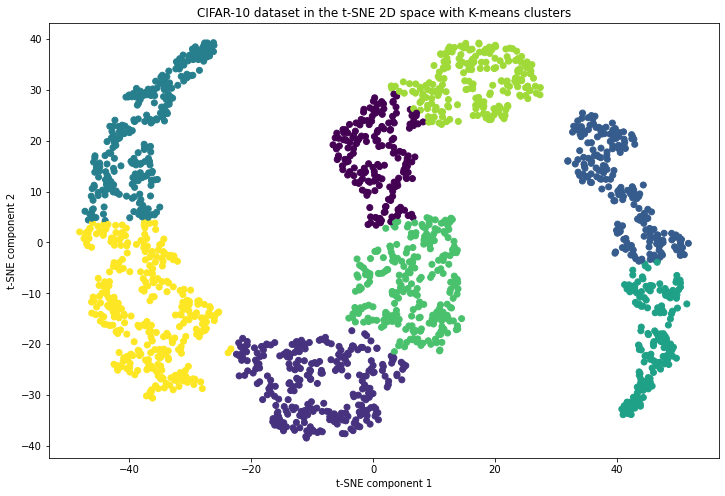

In [90]:
plt.figure(figsize=(12, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=predicted_values)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('CIFAR-10 dataset in the t-SNE 2D space with K-means clusters')
plt.show()